In [2]:
#DATA PREPROCESSING (IMPORTNG LIBRARIES)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split

In [3]:
#IMPORTNG DATASET
data = pd.read_csv(r'C:\Users\SALONI\Downloads\IMDB MOVIE DATASET SEM7.csv')

In [3]:
#DATA PREPROCESSING
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

print(X)

[[1 'Guardians of the Galaxy' 'Action,Adventure,Sci-Fi' ... 8.1 757074
  333.13]
 [2 'Prometheus' 'Adventure,Mystery,Sci-Fi' ... 7.0 485820 126.46]
 [3 'Split' 'Horror,Thriller' ... 7.3 157606 138.12]
 ...
 [998 'Step Up 2: The Streets' 'Drama,Music,Romance' ... 6.2 70699 58.01]
 [999 'Search Party' 'Adventure,Comedy' ... 5.6 4881 nan]
 [1000 'Nine Lives' 'Comedy,Family,Fantasy' ... 5.3 12435 19.64]]


In [5]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [6]:
#display top 10 rows of the dataset
data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [7]:
data.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [8]:
#Check Last 10 Rows of The Dataset
data.tail(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [4]:
data.shape

(1000, 13)

In [5]:
#Find Shape of Our Dataset(Number of Rows and Number of Columns)
print("Number of Rows",data.shape)

Number of Rows (1000, 13)


In [6]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 1000
Number of Columns: 13


In [7]:
#Getting information about our dataset like total number of rows,total number of columns,datatypes of each column and memory requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
 12  review              1000 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 101.7+ KB


In [29]:
#HANDLING MISSING DATA
print("Any missing value?",data.isnull().values.any())

Any missing value? True


In [11]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [12]:
data.isnull().sum().sort_values(ascending=False)

Revenue (Millions)    128
Metascore              64
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
dtype: int64

In [13]:
#for row null count here
data.isnull().sum(axis=1).sort_values(ascending=False)


274    2
39     2
123    2
196    2
25     2
      ..
352    0
353    0
354    0
355    0
999    0
Length: 1000, dtype: int64

In [10]:
#for row null percentage
data.isnull().sum(axis=1).sort_values(ascending=False)/len(data)*100

274    0.2
39     0.2
123    0.2
196    0.2
25     0.2
      ... 
352    0.0
353    0.0
354    0.0
355    0.0
999    0.0
Length: 1000, dtype: float64

In [15]:
#count the number of rows having more than 5 values missing
data.isnull().sum(axis=1).sort_values(ascending=False) >5

274    False
39     False
123    False
196    False
25     False
       ...  
352    False
353    False
354    False
355    False
999    False
Length: 1000, dtype: bool

In [8]:
(data.isnull().sum(axis=1).sort_values(ascending=False) >5).sum()


0

In [9]:

(data.isnull().sum(axis=1).sort_values(ascending=False) <=5).sum()


1000

In [20]:
data['Actors'].notnull()

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: Actors, Length: 1000, dtype: bool

In [21]:
data[data['Actors'].notnull()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [22]:
#check missing values in the dataset
per = data.isnull() .sum() * 100/len(data)
print(per) 


Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64


In [23]:
#Drop all the missing values
data.dropna(axis=1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881


In [24]:
#check for duplicate value
dup_data = data.duplicated().any()
print("Are there any duplicated values?",dup_data)


Are there any duplicated values? False


In [25]:
data = data.drop_duplicates()
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [10]:
new_data = data.interpolate()
new_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,36.130,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,38.825,22.0


In [11]:
new_data = data.fillna(0)
new_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,0.00,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,0.00,22.0


In [13]:
new_data = data.dropna()
new_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [66]:
new_data = data.replace(76,np.NaN)
new_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,NaN
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999.0,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [26]:
#get overall statistics about dataframe
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [27]:
data.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [28]:
#display title of movie having runtime >=180minutes
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [29]:
data['Runtime (Minutes)']>=180

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Runtime (Minutes), Length: 1000, dtype: bool

In [30]:
data[data['Runtime (Minutes)']>=180]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0
88,89,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.0
311,312,La vie d'Adèle,"Drama,Romance","Adèle's life is changed when she meets Emma, a...",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0
828,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,25.03,NaN
965,966,Inland Empire,"Drama,Mystery,Thriller",As an actress starts to adopt the persona of h...,David Lynch,"Laura Dern, Jeremy Irons, Justin Theroux, Karo...",2006,180,7.0,44227,NaN,NaN


In [11]:
data[data['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

In [12]:
data.groupby('Year')['Votes'].mean()


Year
2006    269289.954545
2007    244331.037736
2008    275505.384615
2009    255780.647059
2010    252782.316667
2011    240790.301587
2012    285226.093750
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

In [14]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [15]:
data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)


Year
2009    112.601277
2012    107.973281
2010    105.081579
2008     99.082745
2007     87.882245
2011     87.612258
2013     87.121818
2006     86.296667
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

In [16]:
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

In [17]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [18]:
data.nlargest(10,'Runtime (Minutes)')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
828,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,25.03,NaN
88,89,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.0
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0
311,312,La vie d'Adèle,"Drama,Romance","Adèle's life is changed when she meets Emma, a...",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0
965,966,Inland Empire,"Drama,Mystery,Thriller",As an actress starts to adopt the persona of h...,David Lynch,"Laura Dern, Jeremy Irons, Justin Theroux, Karo...",2006,180,7.0,44227,NaN,NaN
267,268,Cloud Atlas,"Drama,Sci-Fi",An exploration of how the actions of individua...,Tom Tykwer,"Tom Hanks, Halle Berry, Hugh Grant, Hugo Weaving",2012,172,7.5,298651,27.10,55.0
430,431,3 Idiots,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
75,76,Pirates of the Caribbean: At World's End,"Action,Adventure,Fantasy","Captain Barbossa, Will Turner and Elizabeth Sw...",Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley,Ge...",2007,169,7.1,498821,309.40,50.0
271,272,The Hobbit: An Unexpected Journey,"Adventure,Fantasy","A reluctant hobbit, Bilbo Baggins, sets out to...",Peter Jackson,"Martin Freeman, Ian McKellen, Richard Armitage...",2012,169,7.9,668651,303.00,58.0


In [19]:
data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]

,Title,Runtime (Minutes)
828,Grindhouse,191
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
965,Inland Empire,180
267,Cloud Atlas,172
430,3 Idiots,170
36,Interstellar,169
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169


In [21]:
top10_len=data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']].set_index('Title')
top10_len

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


In [23]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [24]:
data['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

In [26]:
data.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [27]:
#Most popular movie title (highest revenue)
data[data['Revenue (Millions)'].max() == data['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [28]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [29]:
top10_len=data.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')
top10_len

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Dangal,8.8,Nitesh Tiwari
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan


In [31]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [32]:
data.nlargest(10,'Revenue (Millions)')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
578,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


In [33]:
#top10 highest revenue movie titles
data.nlargest(10,'Revenue (Millions)')['Title']

50     Star Wars: Episode VII - The Force Awakens
87                                         Avatar
85                                 Jurassic World
76                                   The Avengers
54                                The Dark Knight
12                                      Rogue One
119                                  Finding Dory
94                        Avengers: Age of Ultron
124                         The Dark Knight Rises
578               The Hunger Games: Catching Fire
Name: Title, dtype: object

In [34]:
data.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']]


,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


In [36]:
top_10=data.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']].set_index('Title')
top_10

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


In [38]:
#find average rating of movies year wise
data.columns
data.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2007    7.133962
2006    7.125000
2009    6.960784
2012    6.925000
2011    6.838095
2014    6.837755
2010    6.826667
2013    6.812088
2008    6.784615
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

In [45]:
#count number of action Movies
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_cat'],
      dtype='object')

In [46]:
data['Genre'].dtype

dtype('O')

In [48]:
len(data[data['Genre'].str.contains('Actions',case=False)])

0

In [49]:
#find unique value from genre
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_cat'],
      dtype='object')

In [50]:
data['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

<AxesSubplot:>

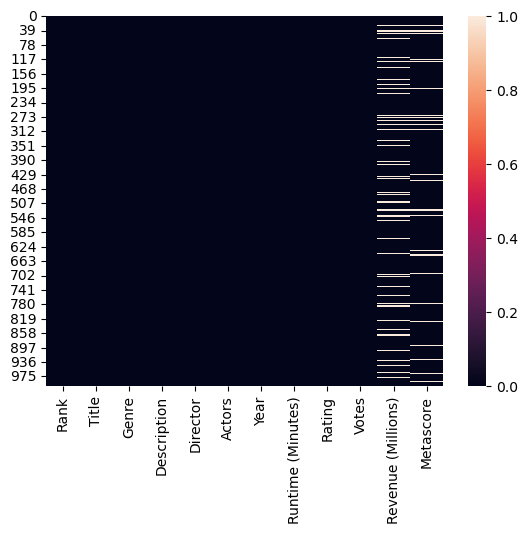

In [32]:
#Data Visualization
sns.heatmap(data.isnull())

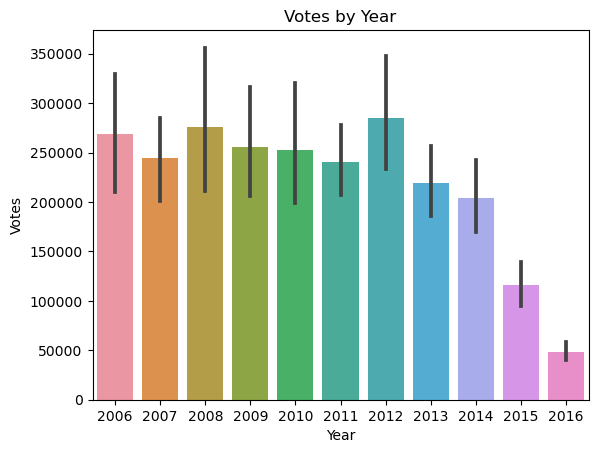

In [13]:
sns.barplot(x='Year', y='Votes', data=data)
plt.title("Votes by Year")
plt.show()

<AxesSubplot:xlabel='Runtime (Minutes)', ylabel='Title'>

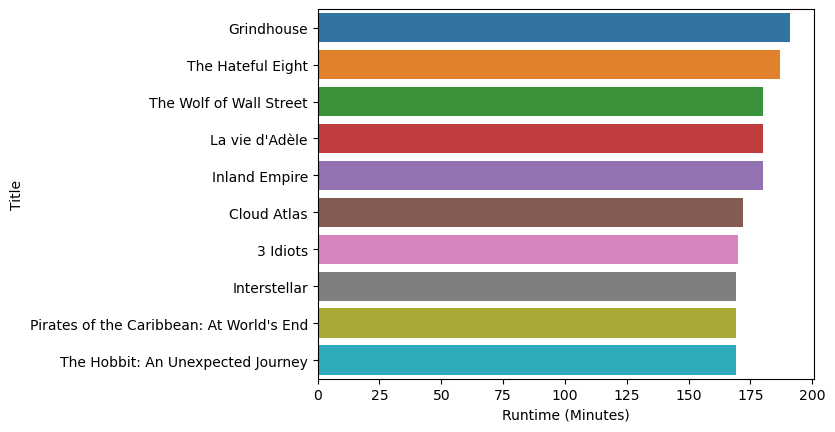

In [22]:
sns.barplot(x='Runtime (Minutes)',y=top10_len.index,data=top10_len)

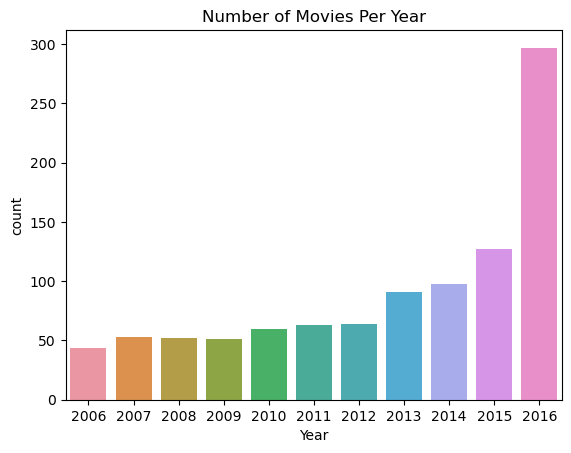

In [25]:
sns.countplot(x='Year',data=data)
plt.title("Number of Movies Per Year" )
plt.show()

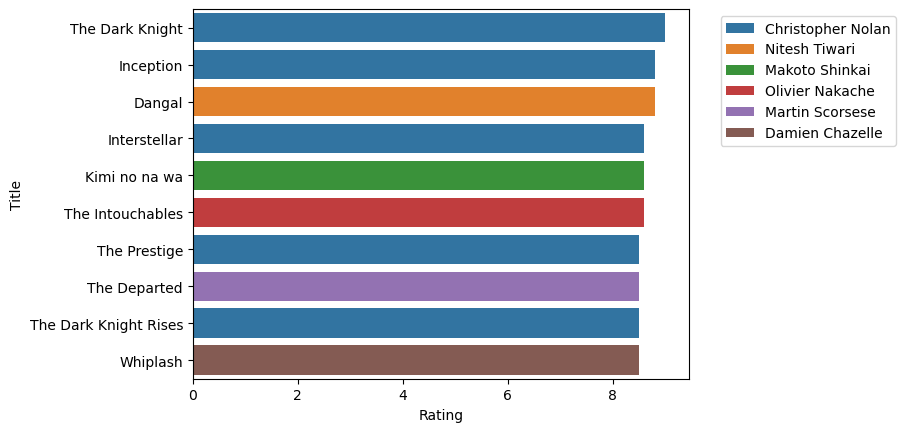

In [30]:
sns.barplot(x='Rating',y=top10_len.index,data=top10_len,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

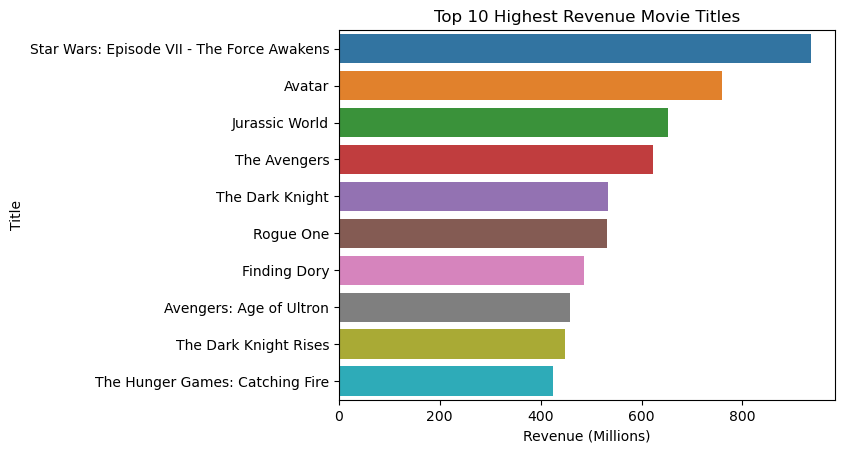

In [37]:
#top 10 highest revenue movie
sns.barplot(x='Revenue (Millions)',y=top_10.index,data=top_10)
plt.title("Top 10 Highest Revenue Movie Titles")
plt.show()

<AxesSubplot:ylabel='Rating'>

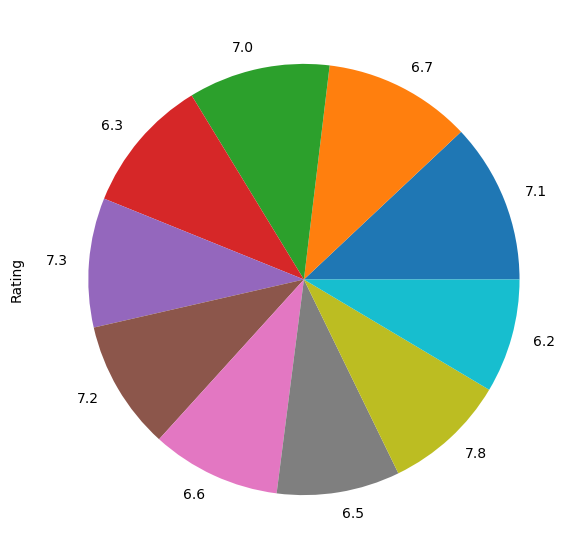

In [39]:

#does rating affect the movie
data.columns
get_ipython().run_line_magic('matplotlib', 'inline')
plt.figure(figsize=(7,7))
data['Rating'].value_counts().nlargest(10).plot(kind='pie')

<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Rating'>

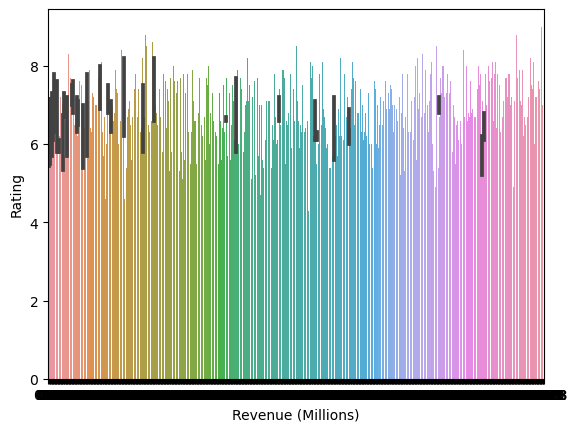

In [41]:
sns.barplot(x="Revenue (Millions)",y="Rating",data=data)

In [7]:
#splitting data set into training and test data set in 0.7/0.3
train, test = train_test_split(data,test_size=0.30)
train.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
197,198,Into the Wild,"Adventure,Biography,Drama","After graduating from Emory University, top st...",Sean Penn,"Emile Hirsch, Vince Vaughn, Catherine Keener, ...",2007,148,8.1,459304,18.35,73.0
353,354,Café Society,"Comedy,Drama,Romance","In the 1930s, a Bronx native moves to Hollywoo...",Woody Allen,"Jesse Eisenberg, Kristen Stewart, Steve Carell...",2016,96,6.7,45579,11.08,64.0
890,891,The Intent,"Crime,Drama",Gunz (Dylan Duffus) is thrust into a world of ...,Femi Oyeniran,"Dylan Duffus, Scorcher,Shone Romulus, Jade Asha",2016,104,3.5,202,NaN,59.0
167,168,Woman in Gold,"Biography,Drama,History","Maria Altmann, an octogenarian Jewish refugee,...",Simon Curtis,"Helen Mirren, Ryan Reynolds, Daniel Brühl, Kat...",2015,109,7.3,39723,33.31,51.0
32,33,X-Men: Apocalypse,"Action,Adventure,Sci-Fi",After the re-emergence of the world's first mu...,Bryan Singer,"James McAvoy, Michael Fassbender, Jennifer Law...",2016,144,7.1,275510,155.33,52.0


In [15]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv(r'C:\Users\SALONI\Downloads\IMDB MOVIE DATASET SEM7.csv')
df = data.dropna()
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,review
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,One of the other reviewers has mentioned that ...
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,A wonderful little production. <br /><br />The...
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,I thought this was a wonderful way to spend ti...
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Basically there's a family where a little boy ...
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,Tim Robbins and John Cusack are two actors I h...
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,"On watching this film, I was amazed at how med..."
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,I hated it. I hate self-aware pretentious inan...
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,I usually try to be professional and construct...


In [16]:
# Select the features we want to use for our analysis
X = df[['Metascore']]
y = df['Rating']

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train)

     Metascore
906       63.0
879       37.0
985       31.0
780       56.0
829       15.0
..         ...
82        75.0
121       48.0
303       55.0
496       58.0
116       51.0

[670 rows x 1 columns]


In [8]:
print(y_train)

906    6.7
879    5.8
985    5.6
780    6.9
829    1.9
      ... 
82     8.2
121    6.7
303    5.5
496    6.8
116    6.2
Name: Rating, Length: 670, dtype: float64


In [9]:
print(X_test)

     Metascore
238       88.0
981       33.0
89        51.0
78        53.0
795       50.0
..         ...
232       68.0
991       42.0
830       63.0
918       56.0
614       66.0

[168 rows x 1 columns]


In [10]:
print(y_test)

238    8.1
981    5.3
89     7.4
78     7.3
795    6.2
      ... 
232    7.8
991    8.5
830    7.2
918    7.5
614    6.6
Name: Rating, Length: 168, dtype: float64


In [19]:
# Create a linear regression model

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the revenue for test data
y_pred = model.predict(X_test)
print("Predicted revenue:",y_pred,sep='\n')

Predicted revenue:
[7.7874628  5.89600407 6.51502692 6.58380724 6.48063677 5.72405327
 7.34039073 5.99917454 7.615512   6.06795486 5.96478438 6.96209899
 6.17112534 7.13404978 6.85892851 6.75575804 6.48063677 6.54941708
 7.0308793  7.71868248 6.17112534 7.23722026 6.82453835 6.23990565
 7.13404978 5.93039423 6.89331867 6.37746629 6.85892851 7.95941359
 6.96209899 6.96209899 7.0308793  7.64990216 6.85892851 6.72136788
 7.58112184 6.96209899 7.37478089 7.0308793  7.13404978 7.44356121
 5.75844343 6.82453835 6.96209899 6.48063677 6.41185645 6.30868597
 7.44356121 7.09965962 6.34307613 6.41185645 5.82722375 5.51771232
 7.16843994 6.65258756 6.37746629 6.89331867 7.09965962 7.09965962
 7.75307264 7.99380375 5.82722375 7.615512   6.89331867 6.99648915
 7.0308793  7.0308793  6.51502692 6.85892851 6.44624661 5.96478438
 7.37478089 6.79014819 7.68429232 7.27161042 7.89063327 7.37478089
 6.0335647  6.6181974  7.30600057 7.13404978 6.79014819 6.6181974
 7.0308793  5.89600407 6.54941708 6.96209899

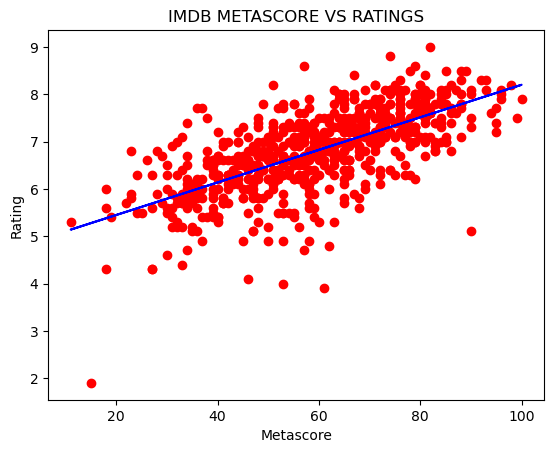

In [21]:
#visualizing the training set
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train, model.predict(X_train),color = 'blue')
plt.title("IMDB METASCORE VS RATINGS")
plt.xlabel("Metascore")
plt.ylabel("Rating")
plt.show()

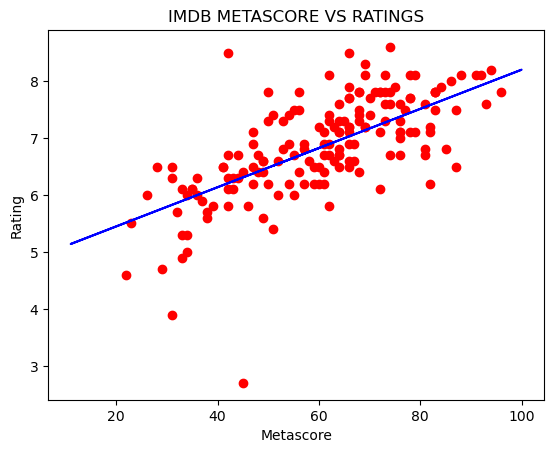

In [22]:
#visualizing the testing set
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_train, model.predict(X_train),color = 'blue')
plt.title("IMDB METASCORE VS RATINGS")
plt.xlabel("Metascore")
plt.ylabel("Rating")
plt.show()

In [26]:
r_sq = model.score(X_test, y_test)
print('Coefficient of determination:', r_sq)


Coefficient of determination: 0.053659390127397844


In [28]:
# Print the Intercept:
print('intercept:', model.intercept_)

intercept: -176.96482539827542


In [29]:
# Print the Slope:
print('slope:', model.coef_)

slope: [-4.46393264e-03  1.54104993e+00  1.23903215e+01]


In [30]:
 movie = input("Enter Movie Name:")
Metascore = df [['Title','Metascore']]
print(Metascore)


Enter Movie Name: Guardians of the Galaxy
                        Title  Metascore
0     Guardians of the Galaxy       76.0
1                  Prometheus       65.0
2                       Split       62.0
3                        Sing       59.0
4               Suicide Squad       40.0
..                        ...        ...
993  Resident Evil: Afterlife       37.0
994                 Project X       48.0
996           Hostel: Part II       46.0
997    Step Up 2: The Streets       50.0
999                Nine Lives       11.0

[838 rows x 2 columns]


In [46]:
df[df['Metascore']>=70]['Title']

0             Guardians of the Galaxy
6                          La La Land
8                  The Lost City of Z
11                     Hidden Figures
13                              Moana
                    ...              
934                    The Love Witch
950    Me and Earl and the Dying Girl
951                   The Descendants
974                    Queen of Katwe
979                The Skin I Live In
Name: Title, Length: 250, dtype: object

In [26]:
pip install TextBlob


     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 640.0 kB/s eta 0:00:01
     --- --------------------------------- 61.4/636.8 kB 648.1 kB/s eta 0:00:01
     ----- ------------------------------- 92.2/636.8 kB 744.7 kB/s eta 0:00:01
     ------------ ------------------------- 204.8/636.8 kB 1.1 MB/s eta 0:00:01
     ------------------------- ------------ 430.1/636.8 kB 1.8 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.0 MB/s eta 0:00:00


In [2]:
from textblob import TextBlob

In [5]:
# feedback = TextBlob("Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.")
# b1 = TextBlob(feedback)
# print(b1.sentiment)
# score = blob.polarity
# score

In [7]:
def sentiment_analysis_values(text):
    blob = TextBlob(text)
    return blob.polarity

def sentiment_analysis_label(text):
    blob = TextBlob(text)
    score = blob.polarity
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [12]:
data['sentiment_analysis_values']=data['review'].apply(sentiment_analysis_values)

In [13]:
data['sentiment_analysis_label']= data['review'].apply(sentiment_analysis_label)

In [14]:
data['sentiment_analysis_label']

0      positive
1      positive
2      positive
3      negative
4      positive
         ...   
995    positive
996    negative
997    negative
998    negative
999    positive
Name: sentiment_analysis_label, Length: 1000, dtype: object

In [15]:
data[['review','sentiment_analysis_values','sentiment_analysis_label']]

,review,sentiment_analysis_values,sentiment_analysis_label
0,One of the other reviewers has mentioned that ...,0.023433,positive
1,A wonderful little production. <br /><br />The...,0.109722,positive
2,I thought this was a wonderful way to spend ti...,0.354008,positive
3,Basically there's a family where a little boy ...,-0.057813,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.217952,positive
...,...,...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...,0.158892,positive
996,I hated it. I hate self-aware pretentious inan...,-0.370513,negative
997,I usually try to be professional and construct...,-0.161574,negative
998,If you like me is going to see this in a film ...,-0.051087,negative


In [16]:
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,review,sentiment_analysis_values,sentiment_analysis_label
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,One of the other reviewers has mentioned that ...,0.023433,positive
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,A wonderful little production. <br /><br />The...,0.109722,positive
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,I thought this was a wonderful way to spend ti...,0.354008,positive
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Basically there's a family where a little boy ...,-0.057813,negative
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,"Petter Mattei's ""Love in the Time of Money"" is...",0.217952,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0,Nothing is sacred. Just ask Ernie Fosselius. T...,0.158892,positive
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,I hated it. I hate self-aware pretentious inan...,-0.370513,negative
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,I usually try to be professional and construct...,-0.161574,negative
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0,If you like me is going to see this in a film ...,-0.051087,negative
